In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("student-mat.csv", sep=";")
data.head()
predict = "G3"
X = data.drop(predict, axis=1)
y = data[predict]

In [3]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=20,
    titlepad=30,
)

In [4]:
# We will use Mutual Information to pick categories that predict the last grade the best.
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


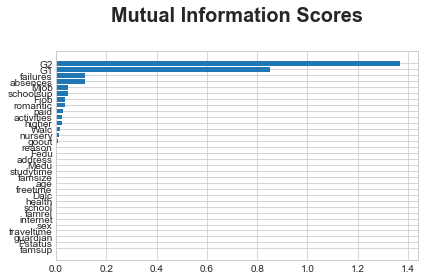

In [5]:
feature_eval = make_mi_scores(X, y)
plot_mi_scores(feature_eval)
dataTypes = data.dtypes
print(dataTypes)

In [6]:
X["Mjob"]

0       at_home
1       at_home
2       at_home
3        health
4         other
         ...   
390    services
391    services
392       other
393    services
394       other
Name: Mjob, Length: 395, dtype: object

In [7]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
X[["romantic_encoded", "schoolsup_encoded"]] = ord_enc.fit_transform(X[["romantic", "schoolsup"]])
print(X["romantic_encoded"])

from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X["Mjob"] = pd.DataFrame(OH_encoder.fit_transform(X[["Mjob"]]))
X["Fjob"] = pd.DataFrame(OH_encoder.fit_transform(X[["Fjob"]]))

0      0.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
390    0.0
391    0.0
392    0.0
393    0.0
394    0.0
Name: romantic_encoded, Length: 395, dtype: float64


In [8]:
features_tobe_used = X[["G1", "G2", "studytime", "failures", "absences", "romantic_encoded","schoolsup_encoded", "Mjob", "Fjob"]]

In [9]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features_tobe_used, y, test_size=0.1, random_state = 2)

In [10]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [11]:
accuracy = linear.score(X_test, y_test)
accuracy

0.8547075303295879

In [12]:
print("co: ", linear.coef_ )
print("Intercept: \n", linear.intercept_)

co:  [ 0.20042149  0.94736255 -0.19580678 -0.23732175  0.0368339  -0.32617803
  0.43604818 -0.11477342 -0.16085281]
Intercept: 
 -1.605922445262344


In [15]:
predictions = linear.predict(X_test)

In [23]:
print(y_test)
print(predictions)

94     14
32     16
222    17
329    14
369    11
25      8
67      6
297     8
157    10
223    13
176    11
77     11
180     8
175     9
142    11
181    12
268    10
294    14
243    12
2      10
380    14
261     8
84     10
393    10
70     15
200    16
20     15
173     0
377    10
342    15
55     10
349    13
24      8
236    13
7       6
313    11
269     0
53     11
28     11
322    11
Name: G3, dtype: int64
[12.35220337 16.08039924 16.87672458 13.69679132 12.21887641  7.9680938
  6.22872248  7.62774026  6.97522932 12.723235   12.99732429  9.91029682
  7.75349681  8.68027743 10.10510646 12.47072477  8.57510281 13.22294241
 12.17210071  6.96196335 14.41919762  7.2584041   9.35355069 11.77125774
 14.42676803 16.4406764  13.87101904  5.08445705  8.27943446 15.49864094
  8.10059203 12.84963757  8.84685102 12.94523555  4.59885726 10.3284149
 -1.12118513  9.71131636 11.2114722  10.54278334]
